In [2]:
%cd ..

/home/apple/ashrae-energy-prediction


In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from scripts.util import load

In [4]:
# load enth_seg_lag
models = [
    load("models/19-11-08_01-41_(new_base_enth_lag)-0.model"),
    load("models/19-11-08_01-41_(new_base_enth_lag)-1.model"),
    load("models/19-11-08_01-41_(new_base_enth_lag)-2.model"),
    load("models/19-11-08_01-41_(new_base_enth_lag)-3.model"),
]

In [5]:
# load enth_seg_lag_seg
models_seg = [
    load("models/19-11-08_01-48_(new_base_enth_lag_seg)-0.model"),
    load("models/19-11-08_01-48_(new_base_enth_lag_seg)-1.model"),
    load("models/19-11-08_01-48_(new_base_enth_lag_seg)-2.model"),
    load("models/19-11-08_01-48_(new_base_enth_lag_seg)-3.model"),
]

In [13]:
def create_df(models):
    data = []
    for m in models:
        data.append(m.feature_importance()[None, :])
    return pd.DataFrame(np.vstack(data), columns=models[0].feature_name())

df = create_df(models)
df_seg = create_df(models_seg)

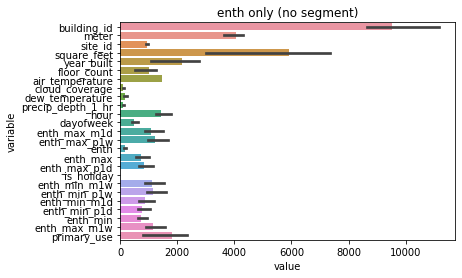

In [29]:
ax = sns.barplot(data=df.melt(), x="value", y="variable", orient="h")
ax.set_title("enth only (no segment)");

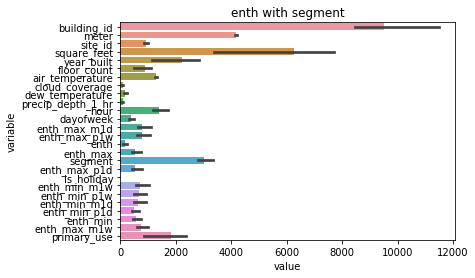

In [30]:
ax = sns.barplot(data=df_seg.melt(), x="value", y="variable", orient="h")
ax.set_title("enth with segment");